In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

#### Swap volume analysis

In [2]:
url = 'https://node-api.flipsidecrypto.com/api/v2/queries/ea9805d5-49cd-4e64-b3c8-894508fb5d6b/data/latest'
query_data = requests.get(url)

In [3]:
df = pd.DataFrame(query_data.json())

In [4]:
df['DATE'] = pd.to_datetime(df['BLOCK_TIMESTAMP']).dt.date

In [5]:
df_filterd = df[df.SWAP_VOLUME > 0][['DATE', 'DIRECTION', 'SWAP_VOLUME']]
order_list = df_filterd.DATE.sort_values().unique()

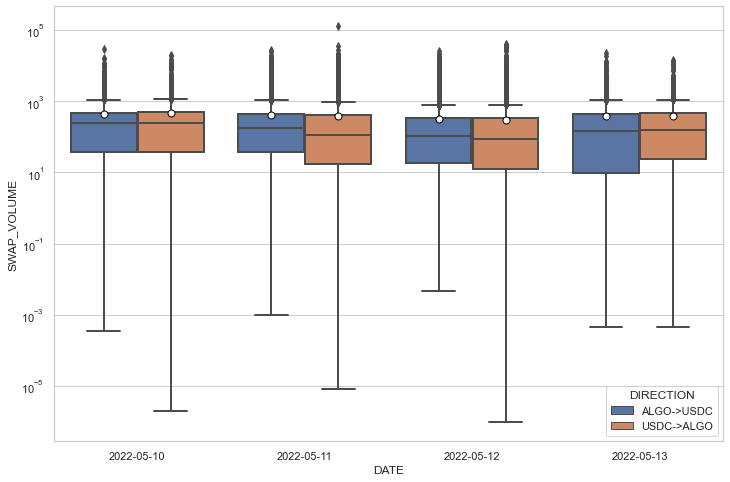

In [6]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='DATE', y='SWAP_VOLUME', 
                 data=df_filterd, hue='DIRECTION', 
                 order=order_list, linewidth=2,
                 showmeans=True,
                 meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
ax.set_yscale('log')

In [7]:
df_filterd.groupby(by=['DATE', 'DIRECTION']).median()

SWAP_VOLUME
DATE       DIRECTION              
2022-05-10 ALGO->USDC   236.099530
           USDC->ALGO   239.288745
2022-05-11 ALGO->USDC   178.664544
           USDC->ALGO   112.788135
2022-05-12 ALGO->USDC   107.080531
           USDC->ALGO    87.715319
2022-05-13 ALGO->USDC   147.709878
           USDC->ALGO   151.703432

In [8]:
df_table = df_filterd.groupby(by=['DATE', 'DIRECTION'])[['SWAP_VOLUME']].describe()
df_table.columns = df_table.columns.get_level_values(1)

In [9]:
df_table['median'] = df_filterd.groupby(by=['DATE', 'DIRECTION'])[['SWAP_VOLUME']].median()

In [10]:
df_table['total'] = df_filterd.groupby(by=['DATE', 'DIRECTION'])[['SWAP_VOLUME']].sum()

In [11]:
df_table

count        mean          std       min        25%  \
DATE       DIRECTION                                                           
2022-05-10 ALGO->USDC   6778.0  428.340460   848.400584  0.000355  37.885655   
           USDC->ALGO   6245.0  474.673421   936.261567  0.000002  36.785164   
2022-05-11 ALGO->USDC  17591.0  402.582240   864.309974  0.001004  37.536053   
           USDC->ALGO  16401.0  392.234363  1464.282037  0.000008  17.161520   
2022-05-12 ALGO->USDC  16347.0  322.680940   811.262416  0.004600  17.964754   
           USDC->ALGO  17049.0  303.104044  1069.224162  0.000001  12.237286   
2022-05-13 ALGO->USDC   5472.0  380.737481   882.142903  0.000440   9.467999   
           USDC->ALGO   5940.0  376.636676   727.289217  0.000454  24.455159   

                              50%         75%            max      median  \
DATE       DIRECTION                                                       
2022-05-10 ALGO->USDC  236.099530  467.907816   28858.358881  236.099530   
           USDC->ALGO  239.288745  490.163735   20000.000000  239.288745   
2022-05-11 ALGO->USDC  178.664544  446.758181   28106.524927  178.664544   
           USDC->ALGO  112.788135  400.000420  127811.472214  112.788135   
2022-05-12 ALGO->USDC  107.080531  329.563344   26210.773192  107.080531   
           USDC->ALGO   87.715319  329.753418   40815.233230   87.715319   
2022-05-13 ALGO->USDC  147.709878  435.062753   22980.882810  147.709878   
           USDC->ALGO  151.703432  459.376461   13967.254012  151.703432   

                              total  
DATE       DIRECTION                 
2022-05-10 ALGO->USDC  2.903292e+06  
           USDC->ALGO  2.964336e+06  
2022-05-11 ALGO->USDC  7.081824e+06  
           USDC->ALGO  6.433036e+06  
2022-05-12 ALGO->USDC  5.274865e+06  
           USDC->ALGO  5.167621e+06  
2022-05-13 ALGO->USDC  2.083395e+06  
           USDC->ALGO  2.237222e+06

In [12]:
df_filterd['log_SWAP_VOLUME'] = np.log10(df_filterd['SWAP_VOLUME'])

[Text(0.5, 0, 'Swap volume (USD) / Log-scale'),
 Text(0, 0.5, 'Date'),
 Text(0.5, 1.0, 'Swap volume (USD) distribution by Date and Direction')]

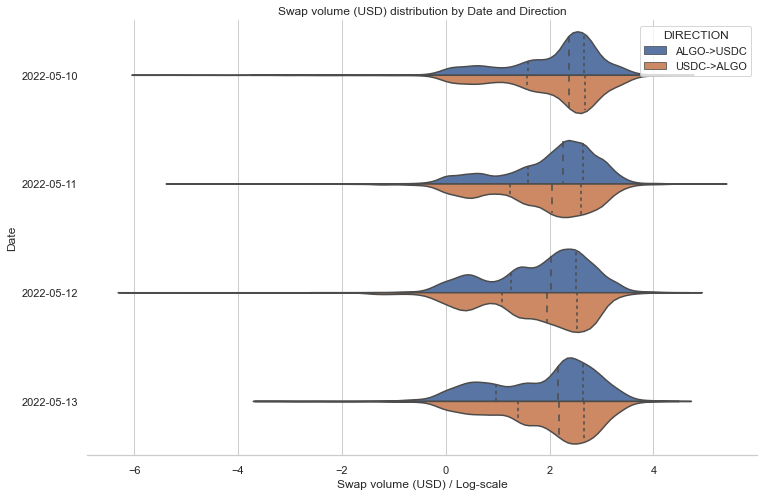

In [13]:
plt.figure(figsize=(12, 8))

v = sns.violinplot(data=df_filterd, x="log_SWAP_VOLUME", y="DATE", hue="DIRECTION",
               split=True, inner="quartile", linewidth=1.5, order=order_list)
               
sns.despine(left=True)

v.set(xlabel = "Swap volume (USD) / Log-scale", 
      ylabel = "Date", 
      title = 'Swap volume (USD) distribution by Date and Direction')

#### Volume Price Analysis

In [14]:
df_hist = df[(df.SWAP_PRICE > 0.25) & (df.SWAP_PRICE < 0.65)][['BLOCK_TIMESTAMP', 'SWAP_PRICE', 'SWAP_VOLUME']]
df_hist = df_hist[(df_hist.BLOCK_TIMESTAMP >= '2022-05-11') & (df_hist.BLOCK_TIMESTAMP < '2022-05-13')]

In [15]:
df_hist = df_hist[(df_hist.BLOCK_TIMESTAMP >= '2022-05-11') & (df_hist.BLOCK_TIMESTAMP < '2022-05-13')]

In [16]:
df_hist['SWAP_PRICE'] = df_hist.SWAP_PRICE.round(2)

In [33]:
hist = px.histogram(df_hist, x='SWAP_VOLUME', y='SWAP_PRICE', 
             nbins=40, orientation='h',
             labels={"SWAP_VOLUME": "Swap Volume (USD)",
                     "SWAP_PRICE": "ALGO price (USD)"})

hist.update_layout(
    title={
        'text': "ALGO-USDC: Volume Price Analysis on May 11th and 12th",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

hist.show()

In [21]:
df_hist = df[(df.SWAP_PRICE >= 0.305) & (df.SWAP_PRICE <= 0.6)][['BLOCK_TIMESTAMP', 'SWAP_PRICE', 'SWAP_VOLUME']]
df_hist = df_hist[(df_hist.BLOCK_TIMESTAMP >= '2022-05-11') & (df_hist.BLOCK_TIMESTAMP < '2022-05-13')]
df_hist['SWAP_PRICE'] = df_hist.SWAP_PRICE.round(2)

In [27]:
df_temp = df_hist.groupby(['SWAP_PRICE'])[['SWAP_VOLUME']].mean().reset_index()

[Text(0.5, 0, 'ALGO price (USD)'),
 Text(0, 0.5, 'Average swap size (USD)'),
 Text(0.5, 1.0, 'Average swap size (USD) vs. ALGO price (USD)')]

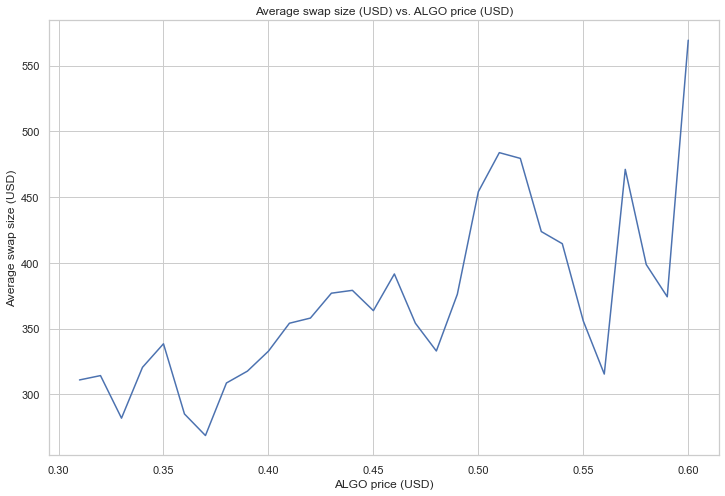

In [34]:
plt.figure(figsize=(12, 8))
l = sns.lineplot(data=df_temp, x="SWAP_PRICE", y="SWAP_VOLUME")

l.set(xlabel = "ALGO price (USD)", 
      ylabel = "Average swap size (USD)", 
      title = 'Average swap size (USD) vs. ALGO price (USD)')